In [ ]:
# !pip install yfinance


In [1]:
# Long Short-Term Memory(LSTM)


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import LSTM, Dense, Dropout 
from keras.optimizers import Adam
import yfinance as yf 

[*********************100%***********************]  1 of 1 completed


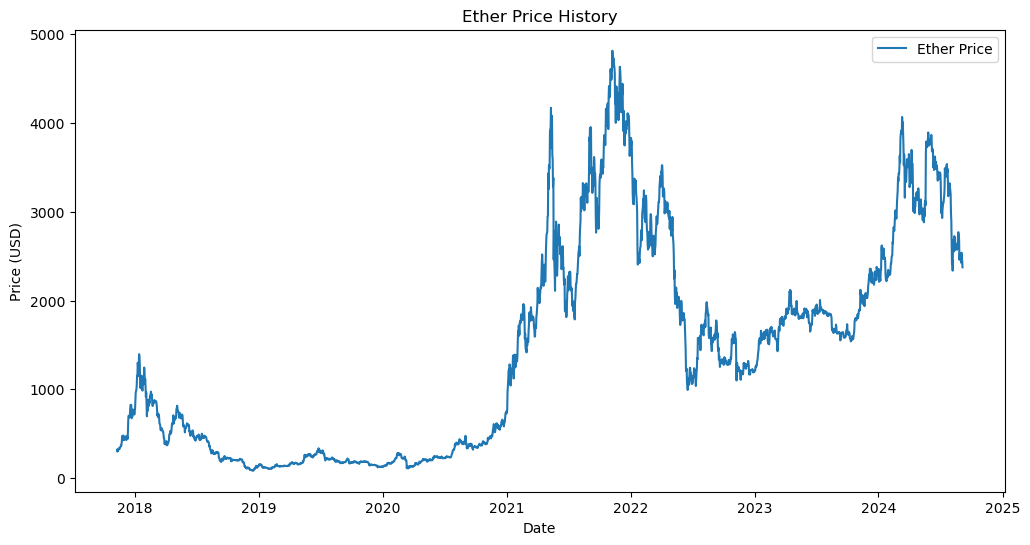

In [2]:
df = yf.download('ETH-USD')
df = df[['Close']]

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Ether Price")
plt.title('Ether Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [4]:
# 80% for training
train_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create training dataset(80%)
train_data = scaled_data[0:train_data_len, :]


In [5]:
# create sequences of 60 time steps
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
        print(X)
    return np.array(X), np.array(y)

In [9]:
X_train, y_train = create_sequences(train_data)

In [ ]:
#Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train (X_trainlshape[0], X_train.shape[1], 1))
X_train

In [ ]:
# LSTM model 
model = Sequential()
# add LSTM lalyers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2)) # dropout to avoid overfitting

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer(Dense)
model.add(Dense(units=1))

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model 
model.fit(X_train, y_train, batch_size=64, epochs=10)

In [ ]:
# Prepare the test data (20% of the data)
test_data = scaled_data[train_data_len - 60:, :]

# Create test sequences
X_test, y_test = create_sequences(test_data)

# Reshape for LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions back to the original scale
predictions = scaler.inverse_transform(predictions)

# Inverse transform the true y_test values
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
# Plot the results
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Stock Price')
plt.plot(valid['Predictions'], label='Predicted Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
